# **Aufgabe 1 - Temperaturabhängige Luftdichte**

Die Dichte von Luft bei 1 bar Umgebungsdruck ist indirekt Proportional zur Temperatur. Dieser Zusammenhang ist für einige Temperaturwerte in folgender Abbildung dargestellt:

![alt text](Abbildungen/plot_density.png)

Mathematisch wird dieser Zusammenhang mit der idealen Gasgleichung beschrieben:

$$ \rho = \frac{p}{R_S \, T} $$

mit der Luftdichte $\rho$, dem Druck $p$, der spezifischen Gaskonstante für Luft $R_S$ und der Temperatur T. Gehen Sie im Rahmen dieses Belegs von einer spezifischen Gaskonstante von $R_S = 287,06\,\text{J/(kg\,K)}$ und einem Luftdruck von $101\,325\,\text{Pa}$ aus.

### **Teilaufgaben**

1. Laden Sie die Rhodaten der Luftdichte aus der Datei `dichte.csv` ein und speichern Sie diese in zwei Numpy-Arrays.
2. Erstellen Sie eine Funktion, mit deren Hilfe ein beliebiger Wert zwischen zwei Stützstellen linear interpoliert werden kann.
3. Interpolieren Sie mit dieser Funktion die Luftdichte bei $T = 260\,\text{K}$, $T = 325\,\text{K}$ und $T = 490\,\text{K}$. Visualisieren Sie die interpolierten Wertepaare und die Ausgangsdaten in einem Diagramm. Achten Sie darauf, dass die interpolierten Werte und Originaldaten unterschiedlich farblich gekennzeichnet sind.
4. Nutzen Sie die ideale Gasgleichung, um für die drei interpolierten Dichtewerte den relativen Fehler durch die lineare Interpolation zu bestimmen.

### **Lösung**

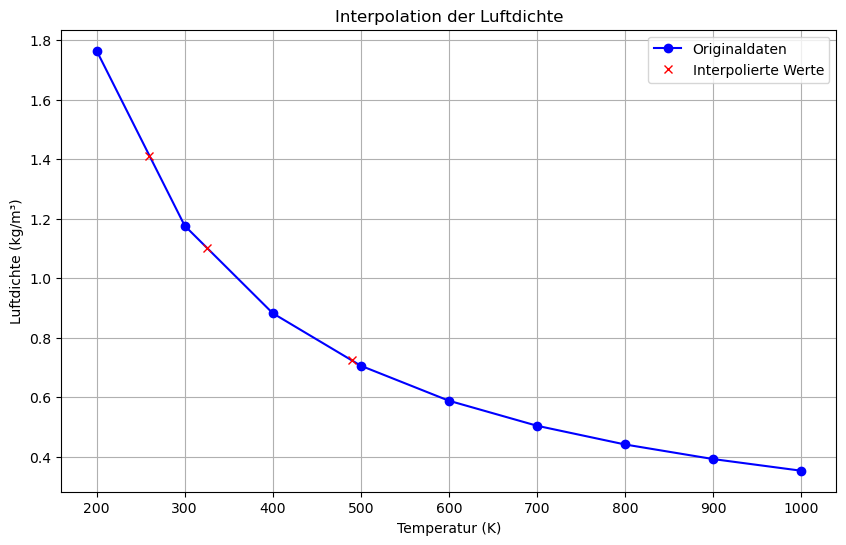

Temperatur: 260 K, Interpolierte Dichte: 1.41 kg/m³, Ideale Dichte: 1.36 kg/m³, Relativer Fehler: 4.00%
Temperatur: 325 K, Interpolierte Dichte: 1.10 kg/m³, Ideale Dichte: 1.09 kg/m³, Relativer Fehler: 1.56%
Temperatur: 490 K, Interpolierte Dichte: 0.72 kg/m³, Ideale Dichte: 0.72 kg/m³, Relativer Fehler: 0.44%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teil 1: die Rohdaten der Luftdichte aus der Datei dichte.csv laden und speichern
temperatur, dichte = np.genfromtxt('Daten\dichte.csv', delimiter=",", unpack=True)

# Teil 2: Funktion erstellen, die zwischen zwei Stützstellen interpoliert
def lineare_interpolation(x):
    for index in range(len(temperatur) - 1):
        if temperatur[index] <= x <= temperatur[index + 1]:  # Bedingung: x muss zwischen zwei Stützstellen sein
            dichte_neu = (x - temperatur[index]) * (dichte[index + 1] - dichte[index]) / (temperatur[index + 1] - temperatur[index]) + dichte[index]
            return dichte_neu
    raise ValueError("x-Wert liegt nicht zwischen den Stützstellen!")  # Fehlermeldung, falls Bedingung nicht erfüllt

# Teil 3: Interpolation und Visualisierung

# Gegebene Temperaturen 
temperaturen_interp = [260, 325, 490] # Einheit K
dichten_interp = [] # Einheit kg/m³

# Interpolation
for T in temperaturen_interp:
    dichte_interpoliert = lineare_interpolation(T)
    dichten_interp.append(dichte_interpoliert)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.plot(temperatur, dichte, 'o-', label='Originaldaten', color='blue')
plt.plot(temperaturen_interp, dichten_interp, 'x', label='Interpolierte Werte', color='red')

plt.xlabel('Temperatur (K)')
plt.ylabel('Luftdichte (kg/m³)')
plt.title('Interpolation der Luftdichte')
plt.legend()
plt.grid()
plt.show()

# Teil 4 : Relative Fehler

# Konstanten
p = 101325  # Druck in Pa
R_S = 287.06  # spezifische Gaskonstante in J/(kg*K)

# Berechnung der Dichten aus der idealen Gasgleichung
dichten_ideal = [p / (R_S * T) for T in temperaturen_interp]

# Berechnung des relativen Fehlers
relative_fehler = [(dichten_interp[i] - dichten_ideal[i]) / dichten_ideal[i] * 100 for i in range(len(dichten_interp))]

# Ausgabe der Ergebnisse
for i, T in enumerate(temperaturen_interp):
    print(f'Temperatur: {T} K, Interpolierte Dichte: {dichten_interp[i]:.2f} kg/m³, Ideale Dichte: {dichten_ideal[i]:.2f} kg/m³, Relativer Fehler: {relative_fehler[i]:.2f}%')
    